**K Mean Clustering** is an ML method based on unsupervised learning that will try to group your data into groups based on similar characteristics

Its main applications are:
* Automatic document group
* Group a customers
* Market segamentation
* Geostatistics

The main objective is to divide the data into K distinct groups based on the parameters

## The algorithm

* Choose a number of K groups (cluster)
* Randomly set a class for all poins
* Until the clusters stop changing, do:
    * For each cluster, obtain its centroid by averaging the cluster's point vectors.
    * Set each point to the cluster at which the centroid is closest.

# Imports

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.cluster         import KMeans
from sklearn.metrics         import classification_report, confusion_matrix
from sklearn.datasets        import make_blobs

%matplotlib inline

In [2]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=50)

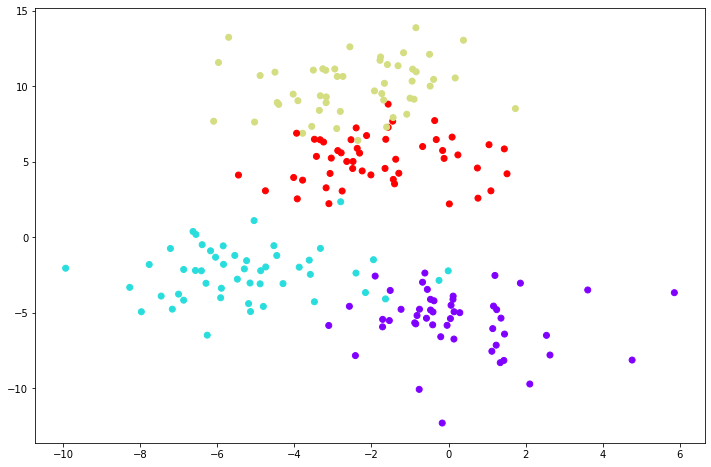

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow');

In [28]:
# Treinando o modelo
kmeans = KMeans(n_clusters=4)

In [29]:
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [30]:
kmeans.cluster_centers_

array([[-2.37178661, 10.27788487],
       [ 0.11584155, -5.37562512],
       [-5.64892498, -2.38445033],
       [-1.94847438,  5.20472404]])

In [31]:
kmeans.labels_

array([0, 1, 3, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 3, 2, 3, 0, 0, 2, 2, 2, 3,
       0, 0, 0, 3, 0, 1, 3, 0, 0, 2, 2, 1, 1, 2, 2, 2, 3, 3, 0, 2, 3, 3,
       1, 1, 0, 3, 3, 0, 1, 2, 3, 0, 3, 3, 1, 2, 2, 3, 1, 1, 0, 1, 1, 0,
       1, 3, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 0, 1,
       0, 2, 1, 0, 1, 3, 3, 2, 1, 3, 1, 3, 2, 1, 3, 0, 3, 1, 3, 1, 2, 0,
       1, 2, 0, 0, 2, 3, 0, 0, 3, 1, 0, 3, 0, 0, 1, 0, 0, 3, 3, 1, 2, 1,
       1, 3, 0, 3, 1, 0, 0, 2, 0, 3, 3, 1, 2, 0, 1, 3, 1, 2, 0, 2, 3, 1,
       1, 3, 0, 1, 1, 1, 3, 3, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 1, 3,
       2, 1, 0, 3, 1, 3, 3, 0, 2, 1, 2, 0, 3, 1, 3, 3, 2, 3, 1, 0, 2, 3,
       2, 0], dtype=int32)

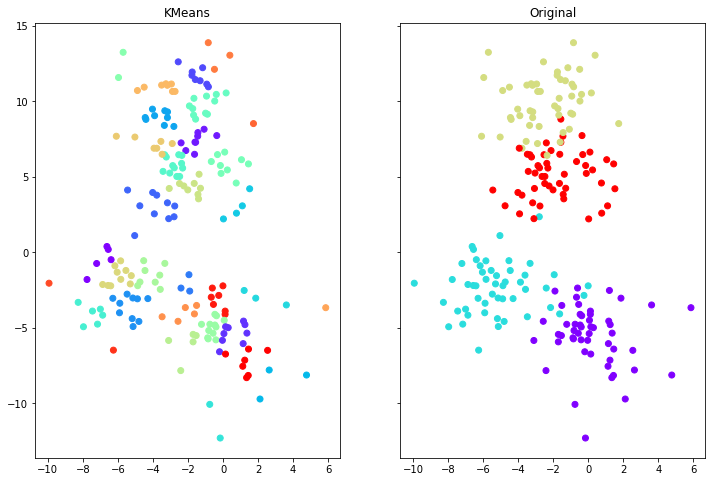

In [27]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,8))
ax1.set_title('KMeans')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow');

# Practice

For this project, we will use K Means to group universities into two different groups: private and public.
___
It's very important to note that we actually have the labels, but we don't use it for this KMeans algorithm because this algorithm is an unsupervised method

**Don't forget:** when you using the K Means algorithm in real situation, you don't have labels. 

In this specific case, we'll use labels to get an idea how well the algorithm was performed.
___

## The Data

Label       | Description
------------|-------------
Private     | A factor with levels: Yes or No, which indicate that the university is private or public.
Apps        | Number of applications received.
Accept      | How many applications accepted.
Enroll      | Number of students enrolled.
Top10perc   | Percentage of new students coming from the top 10% of high school.
Top25perc   | Percentage of new students coming from the top 25% of high school.
F.Undergrad | Number of full-time university students.
P.Undergrad | Number of part-time university students.
Outstate    | Class out of state.
Room.Board  | Room cost.
Books       | Estimated cost of books.
Personal    | Estimated cost per person.
PhD         | Percentage of PhDs in university.
Terminal    | Percentage of students with graduation.
S.F.Ratio   | Student/Faculty Fee.
perc.alumni | Percentage of ex-students who donate.
Expend      | Despesas da instituição por aluno.
Grad.Rate   | Graduation rate.

In [2]:
# Load Data
df = pd.read_csv('data/College_Data', index_col=0)
df.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


# Exploratory Analysis

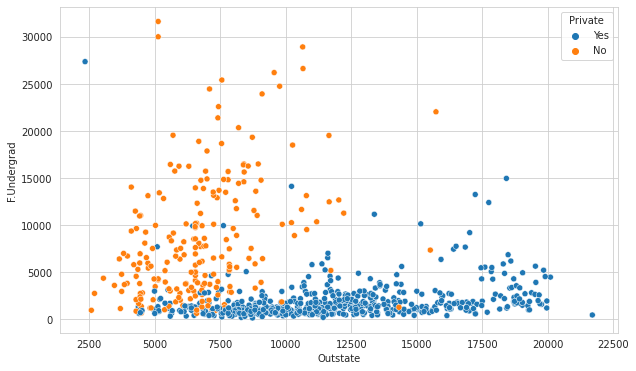

In [5]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.scatterplot(x=df['Outstate'], y=df['F.Undergrad'], hue=df['Private']);

<Figure size 720x432 with 0 Axes>

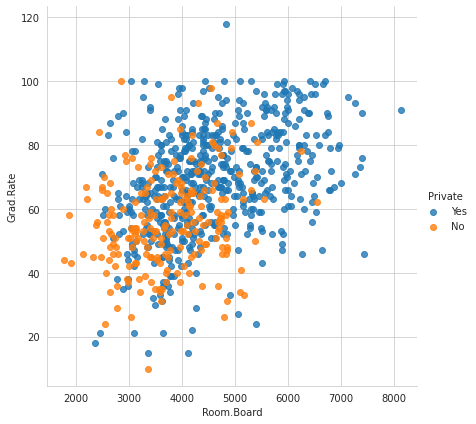

In [6]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', fit_reg=False, height= 6);

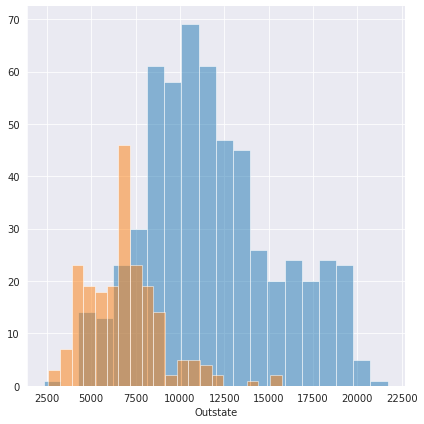

In [7]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue = 'Private', height=6)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.5);

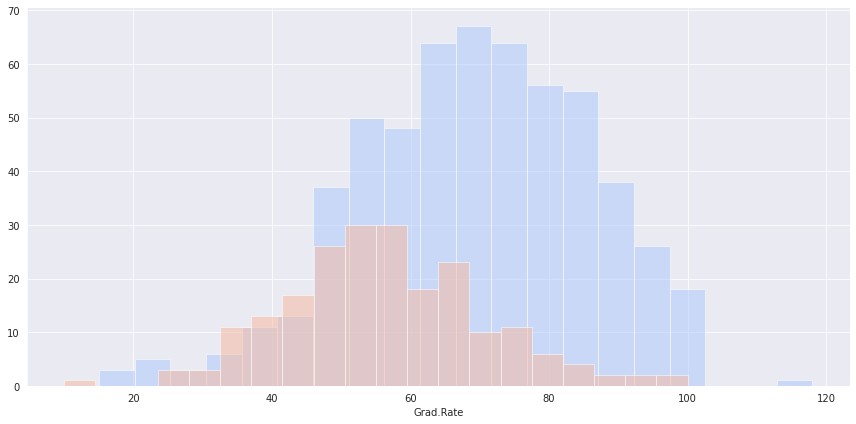

In [8]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue = 'Private', height=6, palette = 'coolwarm', aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.5);

In [9]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [10]:
df['Grad.Rate']['Cazenovia College'] = 100

/tmp/ipykernel_23250/2087630962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


In [11]:
kmeans = KMeans(n_clusters=2)

In [15]:
df_kmeans = df.drop('Private', inplace=False, axis=1)

kmeans.fit(df_kmeans)

KMeans(n_clusters=2)

In [16]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [19]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [20]:
df['Cluster'] = df['Private'].apply(converter)

df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [21]:
print(confusion_matrix(df['Cluster'], kmeans.labels_))

[[ 74 138]
 [ 34 531]]


In [22]:
print(classification_report(df['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

